In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv("mvi_county_df.csv")

df.head(20)

,GEOID,State,county_name,mvi_3_bins,Th1_3_bins,Th2_3_bins,Th3_3_bins,Th4_3_bins,Th5_3_bins,Th6_3_bins,...,Th5_state_avg,Th6_state_avg,callout,callout1,mmr_state,mmr_state_blurb,blurb,pct_lbw,pct_ptb,pop_wra_within_state_rank
0,2282,Alaska,Yakutat,Moderate,Low,Moderate,Moderate,High,Low,High,...,32.342038,47.225757,General healthcare,"On average, women in Yakutat county are more ...",22.0,"22 deaths per 100,000 live births","General Healthcare measures the accessibility,...",NaN,NaN,29.0
1,2060,Alaska,Bristol Bay,Moderate,Low,Moderate,Low,High,Low,Moderate,...,32.342038,47.225757,General healthcare,"On average, women in Bristol Bay county are m...",22.0,"22 deaths per 100,000 live births","General Healthcare measures the accessibility,...",NaN,NaN,28.0
2,2230,Alaska,Skagway Municipality,Low,Low,Low,Low,High,Low,Low,...,32.342038,47.225757,General healthcare,"On average, women in Skagway Municipality cou...",22.0,"22 deaths per 100,000 live births","General Healthcare measures the accessibility,...",NaN,NaN,27.0
3,2164,Alaska,Lake and Peninsula,High,Moderate,High,Moderate,High,High,High,...,32.342038,47.225757,General healthcare,"On average, women in Lake and Peninsula count...",22.0,"22 deaths per 100,000 live births","General Healthcare measures the accessibility,...",NaN,NaN,25.0
4,2105,Alaska,Hoonah-Angoon,Moderate,Low,High,Moderate,High,Moderate,High,...,32.342038,47.225757,General healthcare,"On average, women in Hoonah-Angoon county are...",22.0,"22 deaths per 100,000 live births","General Healthcare measures the accessibility,...",NaN,NaN,26.0
5,2068,Alaska,Denali,Low,Moderate,Low,Low,High,Moderate,Low,...,32.342038,47.225757,General healthcare,"On average, women in Denali county are more v...",22.0,"22 deaths per 100,000 live births","General Healthcare measures the accessibility,...",NaN,NaN,20.0
6,2275,Alaska,Wrangell,Moderate,Low,Moderate,Low,High,Low,Moderate,...,32.342038,47.225757,General healthcare,"On average, women in Wrangell county are more...",22.0,"22 deaths per 100,000 live births","General Healthcare measures the accessibility,...",NaN,NaN,24.0
7,2100,Alaska,Haines,Low,Low,Low,Low,High,Low,Low,...,32.342038,47.225757,General healthcare,"On average, women in Haines county are less v...",22.0,"22 deaths per 100,000 live births","General Healthcare measures the accessibility,...",NaN,NaN,23.0
8,2195,Alaska,Petersburg,Moderate,Low,Low,Low,High,Moderate,High,...,32.342038,47.225757,General healthcare,"On average, women in Petersburg county are mo...",22.0,"22 deaths per 100,000 live births","General Healthcare measures the accessibility,...",NaN,NaN,21.0
9,2013,Alaska,Aleutians East,Moderate,Low,Moderate,Low,High,Moderate,Moderate,...,32.342038,47.225757,General healthcare,"On average, women in Aleutians East county ar...",22.0,"22 deaths per 100,000 live births","General Healthcare measures the accessibility,...",NaN,NaN,22.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GEOID                      3142 non-null   int64  
 1   State                      3142 non-null   object 
 2   county_name                3142 non-null   object 
 3   mvi_3_bins                 3142 non-null   object 
 4   Th1_3_bins                 3142 non-null   object 
 5   Th2_3_bins                 3142 non-null   object 
 6   Th3_3_bins                 3142 non-null   object 
 7   Th4_3_bins                 3142 non-null   object 
 8   Th5_3_bins                 3142 non-null   object 
 9   Th6_3_bins                 3142 non-null   object 
 10  mvi                        3142 non-null   float64
 11  Th1                        3142 non-null   float64
 12  Th2                        3142 non-null   float64
 13  Th3                        3142 non-null   float

In [4]:
df[df['Th3_3_bins'] == 'High']['State'].value_counts()

State
Kentucky                119
Missouri                102
Tennessee                94
Georgia                  87
Indiana                  82
Alabama                  67
Mississippi              66
West Virginia            55
Ohio                     51
Arkansas                 45
Louisiana                41
Florida                  39
Oklahoma                 34
Pennsylvania             34
North Carolina           26
Michigan                 24
Virginia                 23
Texas                    15
South Carolina           15
Washington                5
Montana                   4
Illinois                  4
North Dakota              3
Maryland                  2
Idaho                     2
Arizona                   2
Kansas                    1
Delaware                  1
District of Columbia      1
Maine                     1
New Mexico                1
Utah                      1
Wisconsin                 1
Name: count, dtype: int64

In [11]:
df[df['mvi_3_bins'] == 'High']['State'].value_counts()

State
Texas             166
Georgia           117
Mississippi        78
Tennessee          74
Alabama            65
Arkansas           64
Louisiana          59
Kentucky           58
Missouri           57
Oklahoma           46
North Carolina     41
Florida            40
South Carolina     37
Indiana            33
West Virginia      24
Ohio               18
Virginia           15
South Dakota        9
Alaska              7
Michigan            6
Arizona             6
Kansas              5
Nevada              4
Illinois            4
North Dakota        3
New Mexico          3
Colorado            1
Montana             1
Minnesota           1
Delaware            1
Nebraska            1
Pennsylvania        1
New Jersey          1
Utah                1
Wisconsin           1
Name: count, dtype: int64

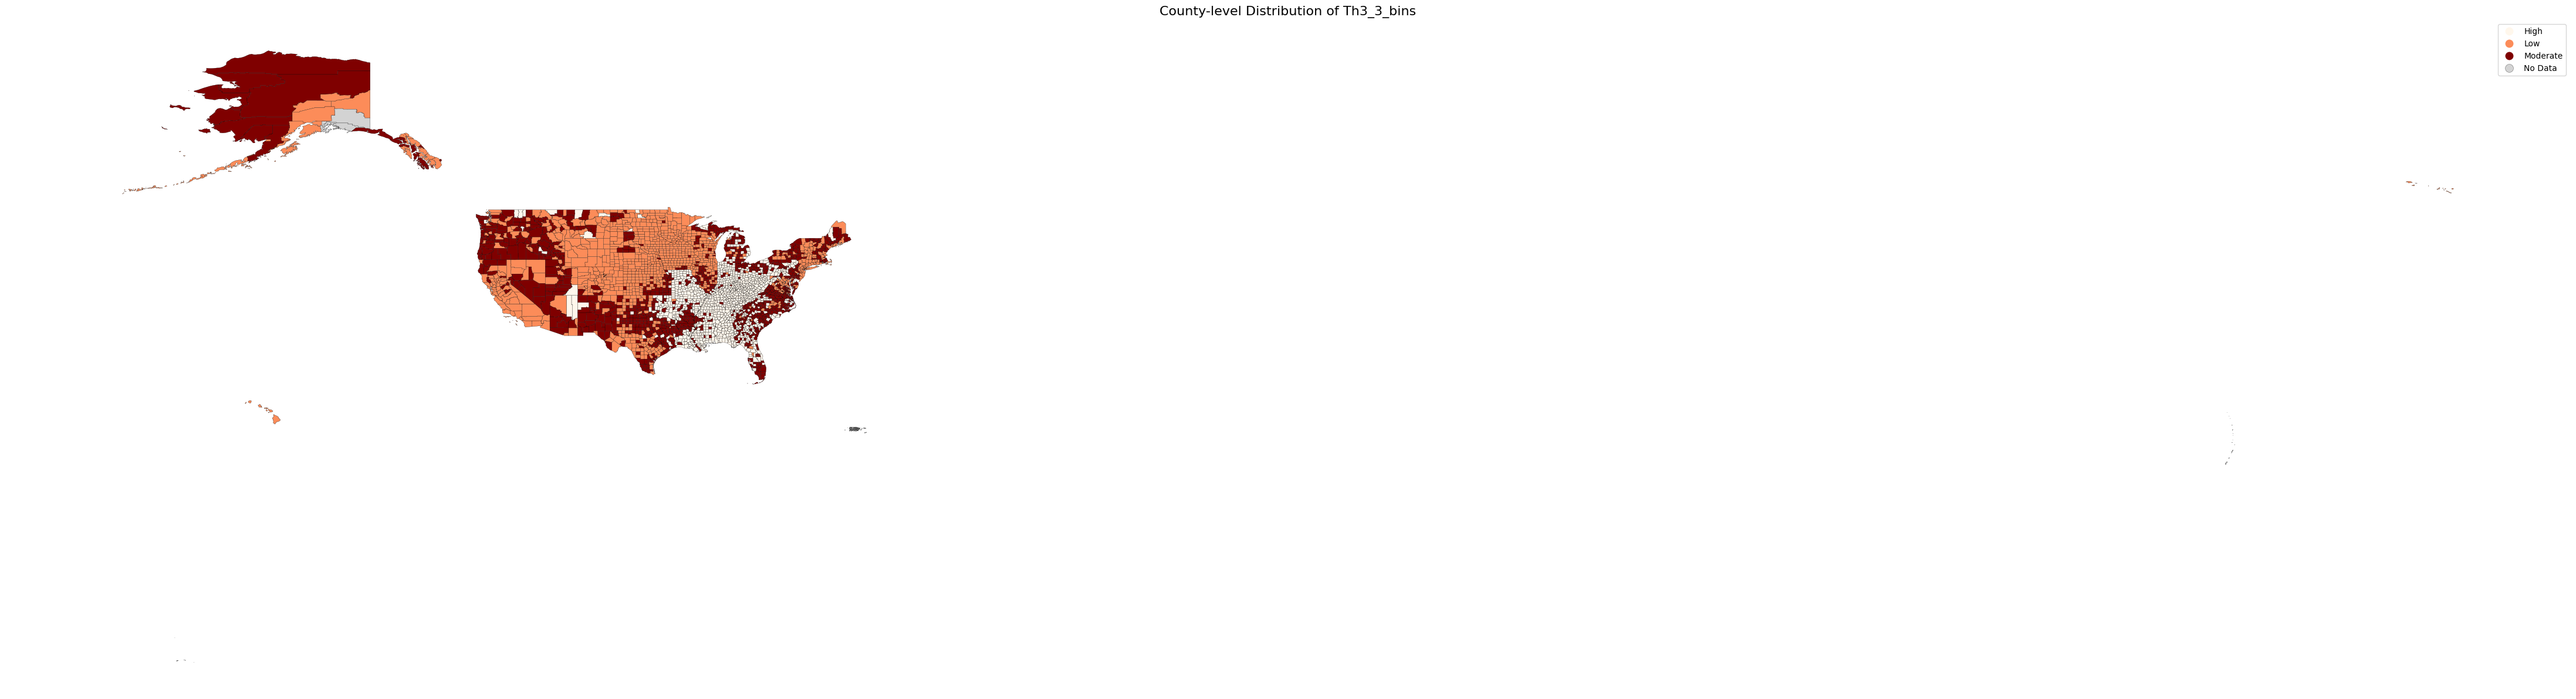

In [10]:

df = pd.read_csv("mvi_county_df.csv")


df["GEOID"] = df["GEOID"].astype(str).str.zfill(5)


county_shapefile_url = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_5m.zip"
counties = gpd.read_file(county_shapefile_url)

counties["GEOID"] = counties["STATEFP"] + counties["COUNTYFP"]

merged = counties.merge(df, on="GEOID", how="left")

fig, ax = plt.subplots(figsize=(44, 40))

merged.plot(
    column="Th3_3_bins",
    cmap="OrRd",  
    linewidth=0.2,
    edgecolor="black",
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)

ax.set_title("County-level Distribution of Th3_3_bins", fontsize=16)
ax.axis("off")

plt.tight_layout()
plt.show()


In [15]:
total_th3 = df["Th3"].sum()

th3_by_bin = df.groupby("Th3_3_bins")["Th3"].sum()

th3_bin_percentages = (th3_by_bin / total_th3) * 100

th3_bin_percentages = th3_bin_percentages.round(2)

th3_bin_percentages

Th3_3_bins
High        55.59
Low         11.12
Moderate    33.29
Name: Th3, dtype: float64

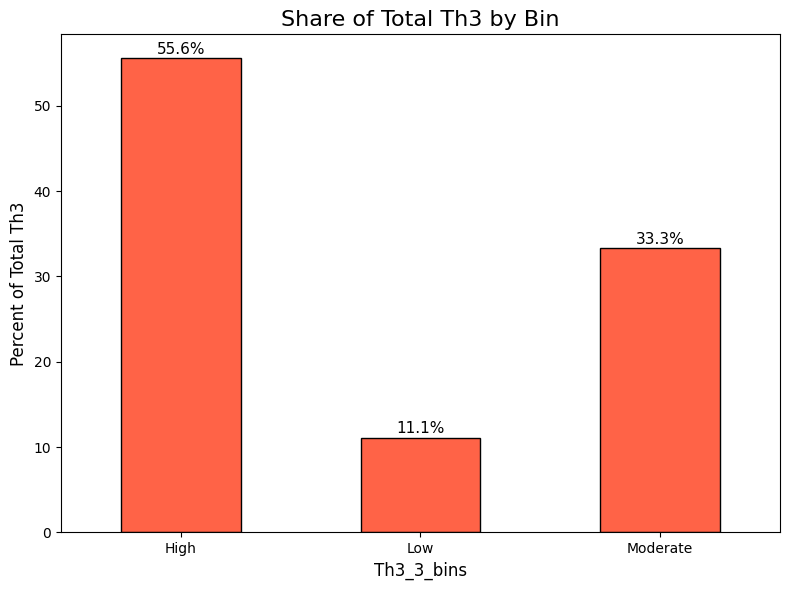

In [16]:
import matplotlib.pyplot as plt

# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 6))

th3_bin_percentages.plot(kind='bar', ax=ax, color='tomato', edgecolor='black')

# Add labels and title
ax.set_title("Share of Total Th3 by Bin", fontsize=16)
ax.set_xlabel("Th3_3_bins", fontsize=12)
ax.set_ylabel("Percent of Total Th3", fontsize=12)

# Show value labels on top of bars
for i, value in enumerate(th3_bin_percentages):
    ax.text(i, value + 0.5, f"{value:.1f}%", ha='center', fontsize=11)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
